<a href="https://colab.research.google.com/github/freddyacuna/Master-in-Finance/blob/main/Stock_tangency_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:

import pandas as pd 
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


[*********************100%***********************]  4 of 4 completed


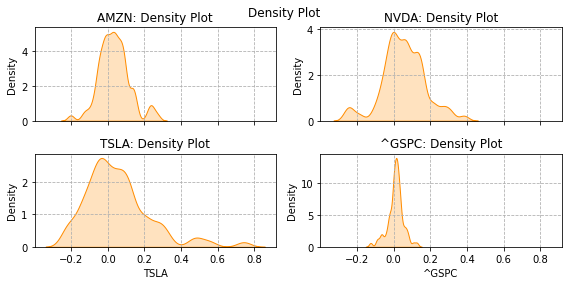

In [4]:

tickers = ['^GSPC', 'TSLA', 'AMZN', 'NVDA']

stocks = yf.download(tickers, start = '2015-01-01', end =  '2021-03-01', interval = '1mo')
stocks = stocks['Close'].dropna()

returns = stocks.pct_change().dropna()

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(8,4))
fig.suptitle('Density Plot')

for k, ax in zip(returns.columns, np.ravel(axes)):
    sns.kdeplot(returns[k], fill=True, color='darkorange', bw_adjust=.50, ax=ax)
    ax.grid(True, linestyle='--')
    ax.set_title(f'{k}: Density Plot')
    
plt.tight_layout()
plt.show()
                

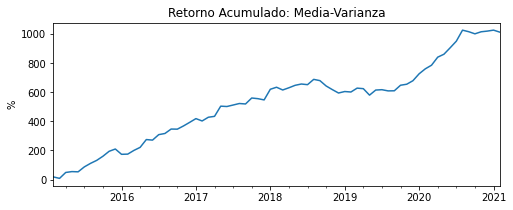

In [5]:

cov = returns.cov()
mu = returns.mean()

ones = np.ones((1, len(mu)))
t = np.linalg.inv(cov).dot(mu) / (ones.dot(np.linalg.inv(cov)).dot(mu))

np.cumsum(returns.dot(t) * 100).plot(figsize=(8,3), 
                                     title='Retorno Acumulado: Media-Varianza', 
                                     ylabel='%', 
                                     xlabel='')

df = returns.dot(t).to_frame()
df.columns = ['tg']
df.index = df.index.strftime('%Y-%m-%d')

In [9]:
df.to_csv('portafolio.csv')

In [6]:
df

,tg
Date,
2015-02-01,0.188695
2015-03-01,-0.103104
2015-04-01,0.406482
2015-05-01,0.058956
2015-06-01,-0.014978
...,...
2020-10-01,-0.145900
2020-11-01,0.140866
2020-12-01,0.046735


In [ ]:
returns.cov()
returns.mean()

In [7]:
df.cov()

,tg
tg,0.061531


In [8]:
df.mean()

tg    0.138641
dtype: float64

In [ ]:

import statsmodels.formula.api as smf

ff = pd.read_csv('F-F_Research_Data_Factors.csv', index_col = 0)

df1 = pd.concat([ff,df], axis=1).dropna()
df1['tg_rf'] = df1.tg - df1.RF

df1.columns = [i.replace('-','_') for i in df1.columns]

res = smf.ols("tg_rf ~ Mkt_RF + SMB + HML", data = df1).fit()

print(res.summary())